In [1293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1294]:
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering 

In [1295]:
from sklearn.decomposition import PCA 

from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 

With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then, there was a helicopter crash involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.

Should travelers avoid airlines that have had crashes in the past? That is the question we will try to address in this exercise. The dataset for this has been sourced from Aviation Safety Network

***Dataset columns***

| Attribute Name| Attribute Description | 
| --- | --- | 
|  airline | Airline (asterisk indicates that regional subsidiaries are included) | 
| avail_seat_km_per_week | Available seat kilometers flew every week |
| incidents_85_99 | Total number of incidents, 1985–1999 |
| fatal_accidents_85_99 | Total number of fatal accidents, 1985–1999|
| fatalities_85_99 | Total number of fatalities, 1985–1999 |
| incidents_00_14 | Total number of incidents, 2000–2014 |
| fatal_accidents_00_14 | Total number of fatal accidents, 2000–2014|
| fatalities_00_14 | Total number of fatalities, 2000–2014 |

----

***Step 1***

Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records.

In [1296]:
df = pd.read_csv('~/UW/IMT_574/Week5/Homework/airline-safety.csv')
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


----

In [1297]:
#Checking for missing values to impute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [1298]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avail_seat_km_per_week,56.0,1.384621e+09,1.465317e+09,259373346.0,4.740362e+08,802908893.0,1.847239e+09,7.139291e+09
incidents_85_99,56.0,7.178571e+00,1.103566e+01,0.0,2.000000e+00,4.0,8.000000e+00,7.600000e+01
fatal_accidents_85_99,56.0,2.178571e+00,2.861069e+00,0.0,0.000000e+00,1.0,3.000000e+00,1.400000e+01
fatalities_85_99,56.0,1.124107e+02,1.466911e+02,0.0,0.000000e+00,48.5,1.842500e+02,5.350000e+02
incidents_00_14,56.0,4.125000e+00,4.544977e+00,0.0,1.000000e+00,3.0,5.250000e+00,2.400000e+01
fatal_accidents_00_14,56.0,6.607143e-01,8.586837e-01,0.0,0.000000e+00,0.0,1.000000e+00,3.000000e+00
fatalities_00_14,56.0,5.551786e+01,1.113328e+02,0.0,0.000000e+00,0.0,8.325000e+01,5.370000e+02


In [1299]:
# nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])   
# nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())   
# nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)   
# print(nulls_summary) 

In [1300]:
#Checking for missing values to impute
# df.isna().any()

In [1301]:
airline_dataset=df.copy()

In [1302]:
airline_dataset['airline_id'] = airline_dataset.index + 1
airline_dataset = airline_dataset.drop(['airline'], axis=1)
airline_dataset.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,airline_id
0,320906734,2,0,0,0,0,0,1
1,1197672318,76,14,128,6,1,88,2
2,385803648,6,0,0,1,0,0,3
3,596871813,3,1,64,5,0,0,4
4,1865253802,2,0,0,2,0,0,5


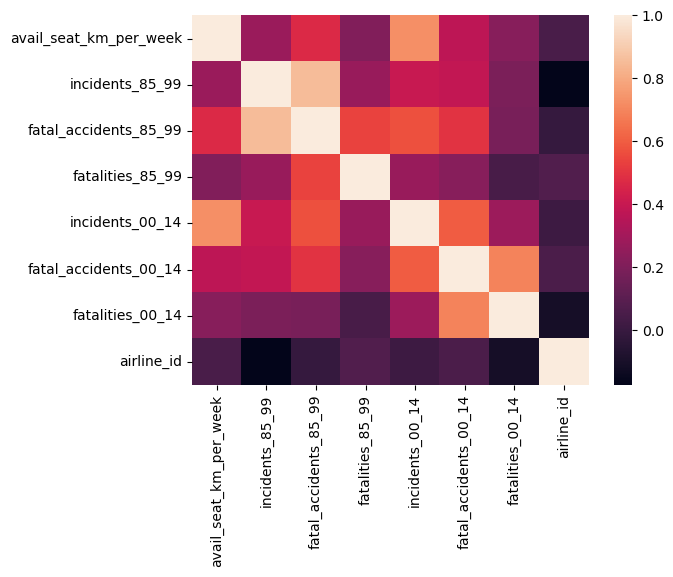

In [1303]:
sns.heatmap(airline_dataset.corr())

In [1304]:
airline_normalized=airline_dataset

In [1305]:
# Normalize heterogenous numerical data by using Standard Scaler
#airline_normalized=StandardScaler().fit_transform(airline_dataset)

In [1306]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
# plt.plot(range(1,11),wcss)
# plt.title('Elbow Graph')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

**K-Means**

In [1307]:
# Cluster algorithm using K=4
num_clusters = 3
clusters_3=KMeans(num_clusters,random_state=30).fit(airline_dataset)
clusters_3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=30)

In [1308]:
clusters_3.labels_

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2], dtype=int32)

In [1309]:
# # Assign clusters to the data set
# airline4=airline_normalized.copy()
# airline4.head()

In [1310]:
airline_dataset_3_clusters=airline_dataset.copy()
airline_dataset_3_clusters['cluster_id']=clusters_3.labels_
airline_dataset_3_clusters

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,airline_id,cluster_id
0,320906734,2,0,0,0,0,0,1,2
1,1197672318,76,14,128,6,1,88,2,2
2,385803648,6,0,0,1,0,0,3,2
3,596871813,3,1,64,5,0,0,4,2
4,1865253802,2,0,0,2,0,0,5,0
5,3004002661,14,4,79,6,2,337,6,0
6,869253552,2,1,329,4,1,158,7,2
7,710174817,3,0,0,5,1,7,8,2
8,965346773,5,0,0,5,1,88,9,2
9,698012498,7,2,50,4,0,0,10,2


In [1311]:
# Compute the centroids for K=4 clusters with 11 variables
clusters_3.cluster_centers_

array([[2.26669618e+09, 5.93750000e+00, 2.00000000e+00, 1.08125000e+02,
        4.43750000e+00, 6.25000000e-01, 4.47500000e+01, 3.15625000e+01],
       [6.29776918e+09, 2.13333333e+01, 8.33333333e+00, 2.75666667e+02,
        1.83333333e+01, 2.33333333e+00, 1.92000000e+02, 2.80000000e+01],
       [6.04820178e+08, 6.56756757e+00, 1.75675676e+00, 1.01027027e+02,
        2.83783784e+00, 5.40540541e-01, 4.91081081e+01, 2.72162162e+01]])

In [1312]:
pred_kmeans_3= clusters_3.fit_predict(airline_normalized)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


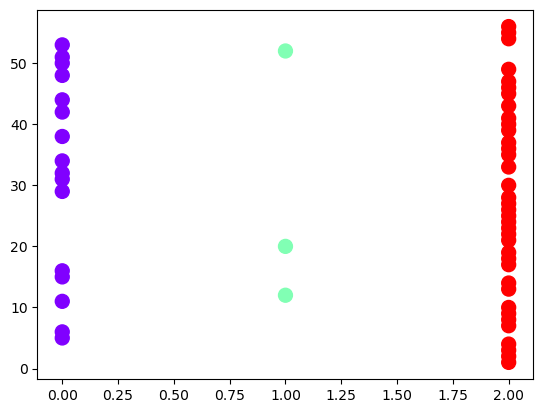

In [1313]:
plt.scatter(airline_dataset_3_clusters['cluster_id'],airline_dataset_3_clusters['airline_id'], s = 100, c = pred_kmeans_3, cmap='rainbow')

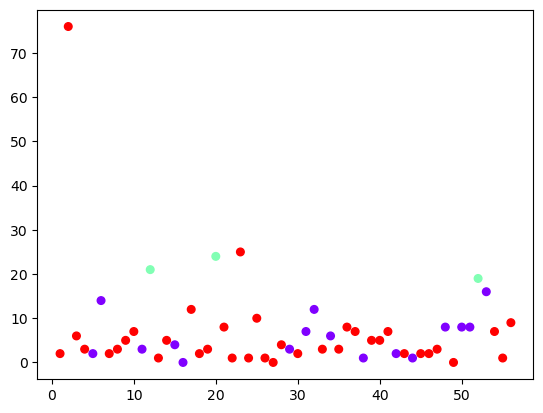

In [1314]:
plt.scatter(airline_normalized.airline_id, airline_normalized['incidents_85_99'], s = 30, c = pred_kmeans_3, cmap='rainbow')

***Agglomerative***

In [1315]:
import scipy.cluster.hierarchy as shc 

In [1316]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
airline_dataset_scaled = scaler.fit_transform(airline_dataset) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
airline_dataset_normalized = normalize(airline_dataset_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
airline_dataset_normalized = pd.DataFrame(airline_dataset_normalized) 

In [1317]:
airline_dataset_normalized.head()

,0,1,2,3,4,5,6,7
0,-0.286463,-0.185177,-0.300482,-0.302398,-0.358152,-0.303637,-0.196782,-0.665375
1,-0.016604,0.811604,0.537725,0.013831,0.053689,0.051422,0.037970,-0.211458
2,-0.293301,-0.045953,-0.327644,-0.329733,-0.295854,-0.331085,-0.214570,-0.672757
3,-0.274150,-0.193091,-0.210068,-0.168295,0.098177,-0.392385,-0.254297,-0.766051
4,0.152433,-0.218076,-0.353867,-0.356123,-0.217282,-0.357583,-0.231743,-0.669612


In [1318]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(airline_dataset_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [1319]:
X_principal.head()

,P1,P2
0,-0.635868,-0.547429
1,0.635275,-0.277698
2,-0.622500,-0.567430
3,-0.481037,-0.662033
4,-0.613254,-0.589342


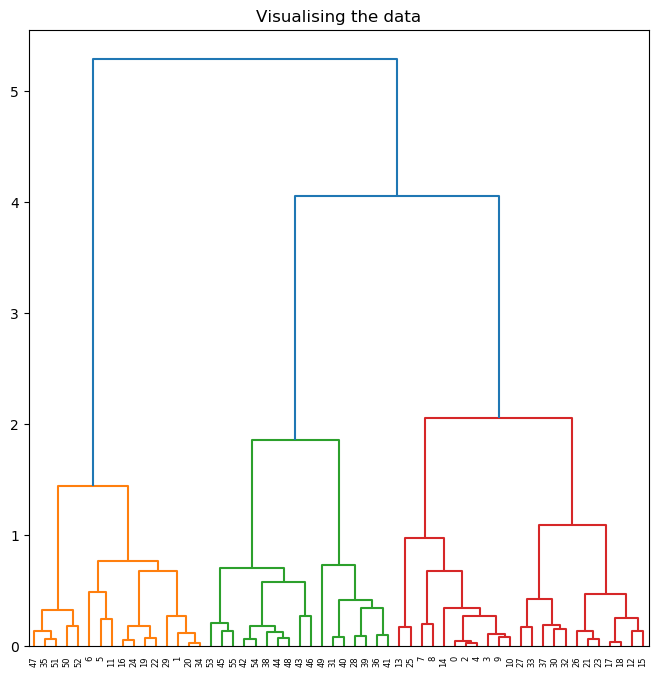

In [1320]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

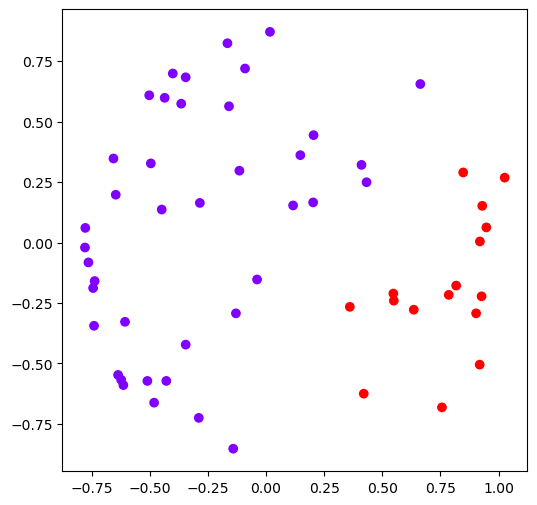

In [1321]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

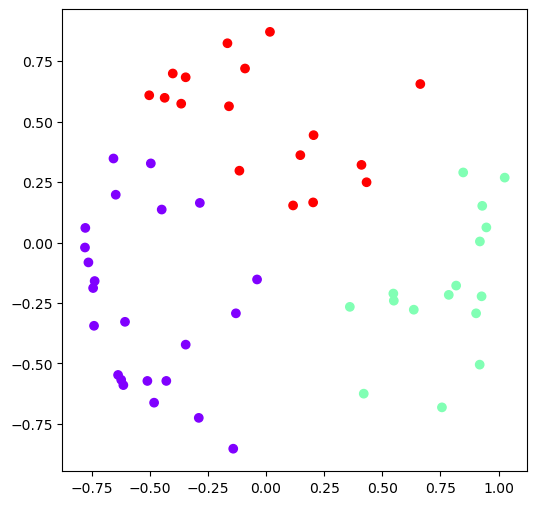

In [1322]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

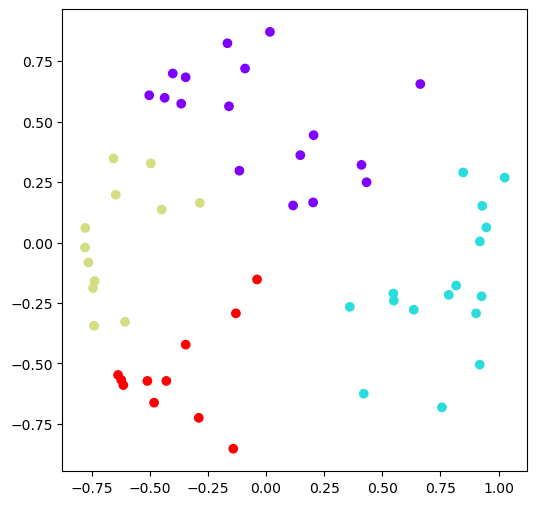

In [1323]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

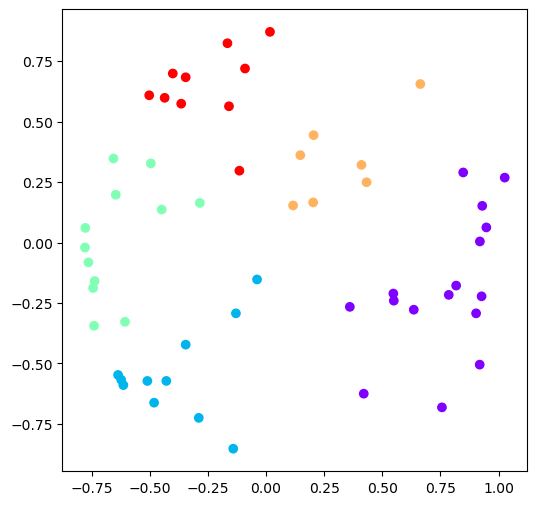

In [1324]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

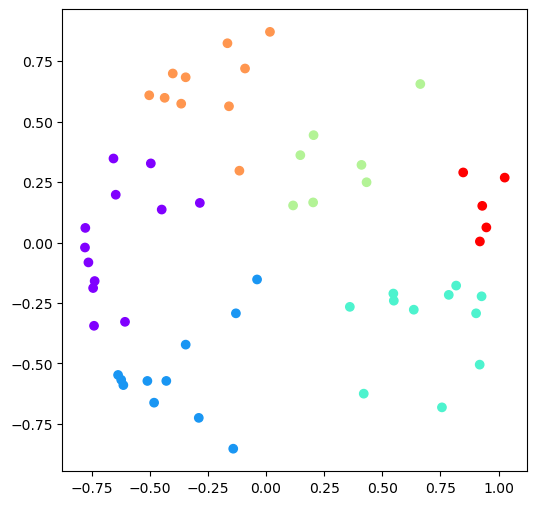

In [1325]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

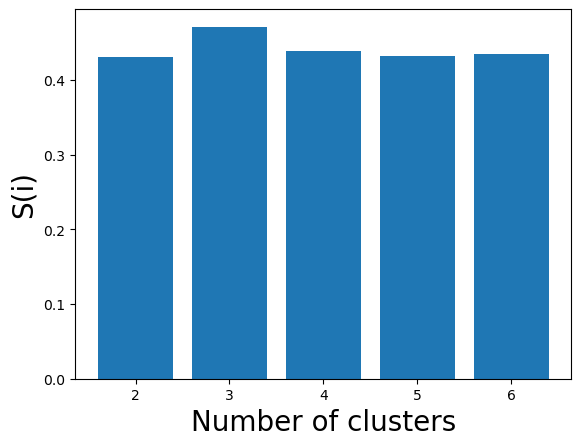

In [1326]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

----

In [1327]:
df = airline_dataset[['airline_id', 'incidents_85_99']]

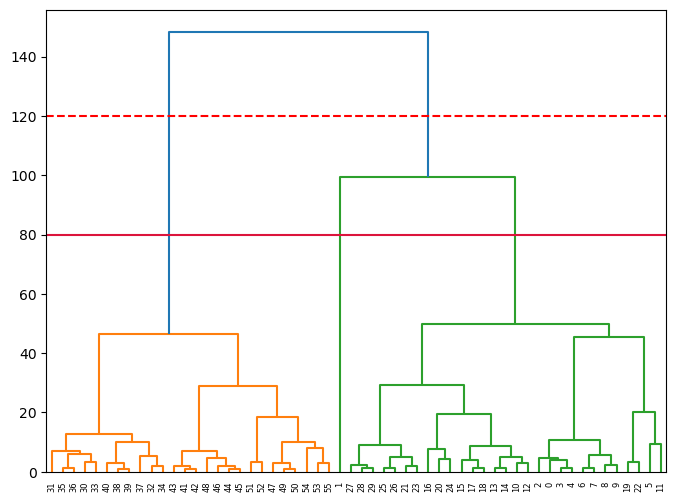

In [1328]:
clusters = hierarchy.linkage(df, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(120, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(80, color='crimson'); 

In [1329]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df)
labels = clustering_model.labels_

Text(0.5, 1.0, 'With clustering')

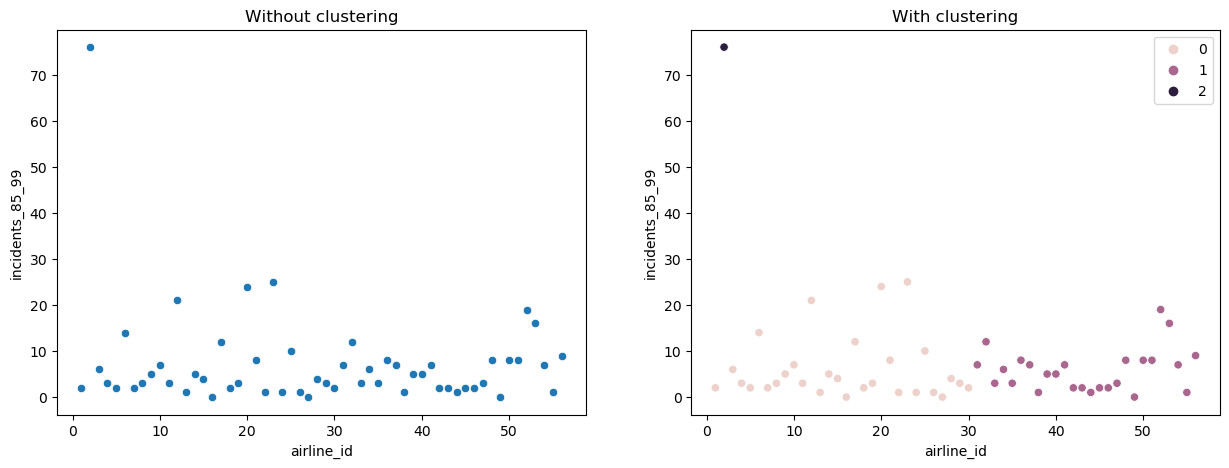

In [1330]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='airline_id', y='incidents_85_99').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='airline_id', y='incidents_85_99', hue=clustering_model.labels_).set_title('With clustering')

In [1331]:
clustering_model_no_clusters = AgglomerativeClustering(linkage="ward")
clustering_model_no_clusters.fit(df)
labels_no_clusters = clustering_model_no_clusters.labels_

Text(0.5, 1.0, 'Without choosing number of clusters')

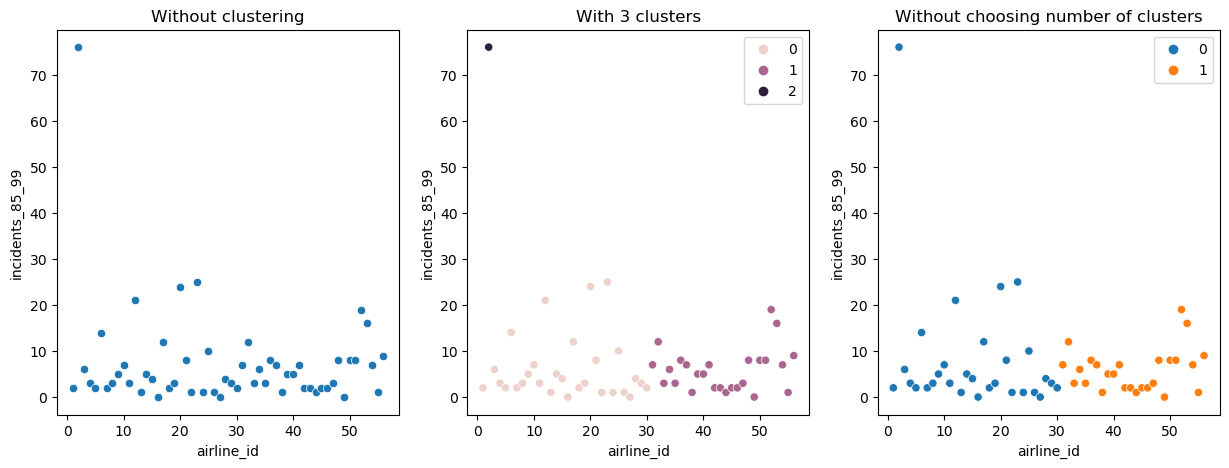

In [1332]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='airline_id', y='incidents_85_99').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='airline_id', y='incidents_85_99', hue=clustering_model.labels_).set_title('With 3 clusters')
sns.scatterplot(ax=axes[2], data=df, x='airline_id', y='incidents_85_99', hue=clustering_model_no_clusters.labels_).set_title('Without choosing number of clusters')

***Step 2***

Do these two approaches lead to the same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations.